In [14]:
import pandas as pd
import matplotlib.pyplot as plt
## sklearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [41]:
myopia_df = pd.read_csv('data/myopia.csv')
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [42]:
## Remove "MYOPIC" column from dataset to remove bias
myopia_df = myopia_df.drop(columns=(['MYOPIC']))
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
## Clean dataset
X = myopia_df.dropna().copy()

In [5]:
## Scale dataset

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [45]:
## principal component analysis
pca = PCA(n_components=0.9)

myopia_pca = pca.fit_transform(X)

myopia_pcs_df = pd.DataFrame(data=myopia_pca)
myopia_pcs_df

,0,1,2,3,4
0,12.138059,31.636212,-4.526625,-3.080821,-3.484665
1,-15.268363,-6.095695,1.207074,0.325835,1.016271
2,-11.662239,3.755105,2.808212,1.365721,-0.140644
3,11.235886,4.012566,-8.179565,-5.106425,-4.550612
4,-22.446506,4.580916,-1.817501,0.234983,0.214823
...,...,...,...,...,...
613,10.414160,-10.950135,5.155179,4.640180,1.602484
614,-16.878251,-3.756665,2.251089,0.374674,0.109415
615,-23.156304,-1.337259,-1.151766,-0.014411,0.342150
616,-2.264481,1.096385,6.458769,-1.052314,-0.874316


In [8]:
pca.explained_variance_ratio_

array([0.72557249, 0.16081428, 0.07227215, 0.02333859, 0.01204572])

In [12]:
## t-SNE reduction
tsne = TSNE(init='pca',learning_rate='auto')
tsne_reduction = tsne.fit_transform(myopia_pcs_df)
tsne_reduction.shape

S:\Anaconda\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(618, 2)

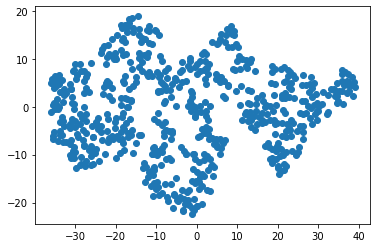

In [55]:
colors = 'r','b','g'

plt.scatter(tsne_reduction[:,0], tsne_reduction[:,1])
plt.show()

In [65]:
## K-means model creation

In [56]:
model = KMeans(n_clusters=5, random_state=5)

In [57]:
model.fit(myopia_pcs_df)

KMeans(n_clusters=5, random_state=5)

In [58]:
predictions = model.predict(myopia_pcs_df)
print(predictions)

[2 3 3 0 3 0 0 3 3 2 4 1 3 3 1 3 1 1 0 1 0 3 3 0 2 2 2 1 3 3 1 0 1 2 1 0 0
 1 3 1 2 3 0 2 2 3 0 3 1 0 3 3 3 3 3 0 2 1 3 1 0 1 0 3 4 0 3 1 2 3 4 3 4 0
 3 1 3 4 0 1 3 1 3 1 3 1 0 0 3 1 2 3 1 1 3 0 2 3 1 1 0 1 0 2 0 0 3 2 1 1 4
 3 3 1 3 3 2 3 1 1 1 1 3 3 4 0 1 3 3 3 1 1 0 1 2 3 3 3 1 0 1 1 3 3 3 2 2 1
 3 0 1 1 4 3 2 3 3 1 3 1 1 3 2 3 1 2 0 2 0 3 3 0 4 1 3 2 3 3 0 3 1 4 1 3 3
 0 3 3 2 1 1 1 1 2 1 0 3 2 3 0 3 3 1 2 2 3 0 1 3 0 4 1 1 2 1 1 0 3 3 0 3 2
 0 3 3 0 0 1 1 3 0 0 1 0 1 3 1 0 3 2 0 1 3 2 3 1 2 3 0 1 1 1 3 0 3 1 3 3 2
 1 2 3 3 2 3 3 2 3 3 3 1 3 1 0 2 3 2 3 0 2 3 4 1 4 1 3 3 0 1 2 3 3 0 3 4 3
 3 3 0 1 3 2 0 1 2 2 0 3 1 0 0 3 2 3 1 1 1 3 1 0 0 0 1 0 1 1 3 1 3 1 1 3 3
 1 3 2 3 3 0 1 0 2 3 1 2 1 2 1 0 1 3 3 1 1 3 1 3 3 0 1 3 3 1 1 1 3 1 0 1 2
 1 2 3 1 4 0 2 0 1 1 4 3 1 2 1 0 3 0 2 0 3 4 2 2 1 2 1 2 3 1 1 3 0 0 0 0 0
 4 0 0 1 2 1 0 1 2 3 2 3 3 0 0 3 3 4 1 3 0 2 1 4 1 3 1 3 1 2 4 1 4 3 3 2 0
 1 3 2 1 3 0 0 0 0 1 1 1 0 3 1 2 1 3 1 2 4 2 3 0 1 0 3 0 3 3 4 3 3 3 3 1 1
 3 1 4 3 1 1 0 3 4 0 3 3 

S:\Anaconda\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


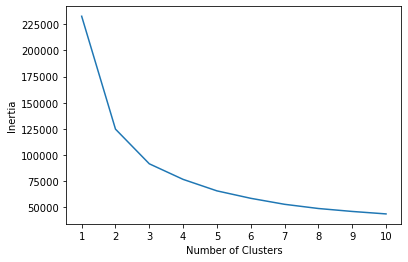

In [61]:
inertia = []
OMP_NUM_THREADS=3
k = list(range(1,11))
for i in k:
    km = KMeans(n_clusters=i, random_state = 0)
    km.fit(myopia_pcs_df)
    inertia.append(km.inertia_)

elbow_data = {"k":k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

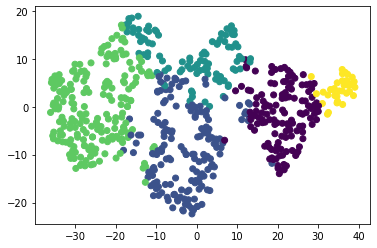

In [64]:
plt.scatter(tsne_reduction[:,0], tsne_reduction[:,1], c=predictions)
plt.show()